## 패션 MNIST 데이터에 합성곱 신경망 적용해보기

In [10]:
#%pip install scikit-learn

In [11]:
#%pip install tensorflow 

In [12]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

### 합성곱 신경망 만들기

첫번째 합성곱 풀링 층 추가
- 결과: (14, 14, 32)

In [13]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1)))

In [14]:
model.add(keras.layers.MaxPooling2D(2))

두번째 합성곱 풀링 층 추가
 - 결과: (7, 7, 64)

In [15]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

3차원 특성 맵을 일렬로 펼친다.
- 마지막에 10개의 뉴런을 가진 출력층에서 확률을 계산하기 때문
  - 중간에 하나의 밀집 은닉층 추가

In [16]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax')) # 다중 분류이므로 softmax 함수 사용

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

### 모델 컴파일과 훈련

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history= model.fit(train_scaled, train_target, epochs=20,
                   validation_data=(val_scaled, val_target),
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7418 - loss: 0.7186 - val_accuracy: 0.8827 - val_loss: 0.3214
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8740 - loss: 0.3524 - val_accuracy: 0.8946 - val_loss: 0.2745
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8924 - loss: 0.3036 - val_accuracy: 0.9038 - val_loss: 0.2604
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9025 - loss: 0.2657 - val_accuracy: 0.9089 - val_loss: 0.2457
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9106 - loss: 0.2459 - val_accuracy: 0.9154 - val_loss: 0.2277
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9163 - loss: 0.2244 - val_accuracy: 0.9147 - val_loss: 0.2257
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9253 - loss: 0.2033 - val_accuracy: 0.9216 - val_loss: 0.2196
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9317 - loss: 0.183

손실 그래프 그려보기

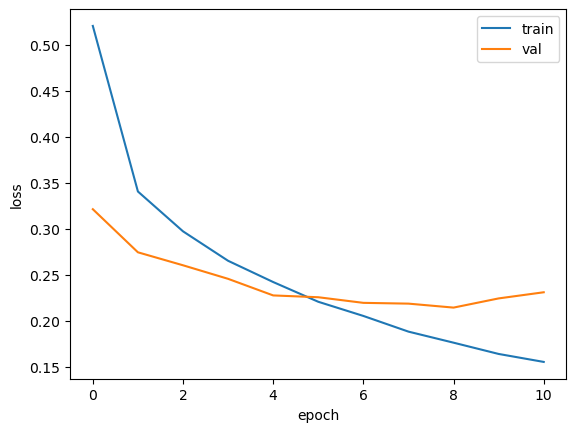

In [19]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9220 - loss: 0.2060


[0.2144206166267395, 0.9227499961853027]

첫번째 샘플 이미지 확인해보기

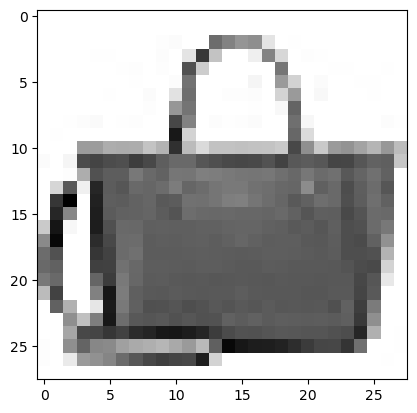

In [21]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

10개의 클래스에 대한 예측 확률 출력해보기

In [22]:
preds= model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[1.2894402e-14 4.2038592e-26 9.1214247e-20 1.7165280e-20 5.9874844e-18
  6.6482953e-21 9.0120385e-18 9.9708556e-17 1.0000000e+00 1.6607963e-16]]


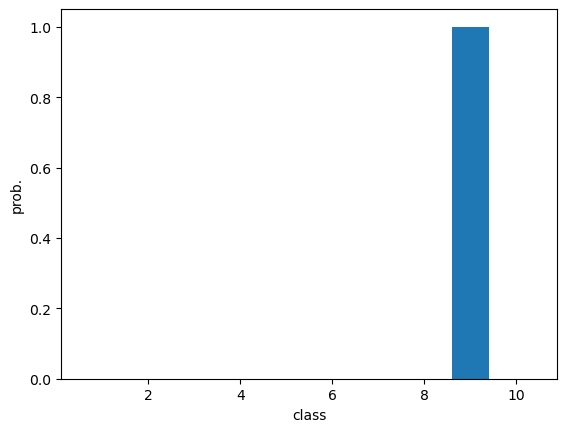

In [23]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [24]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [25]:
import numpy as np
print(classes[np.argmax(preds)])

가방


모델을 실전에 투입했을 때 얻을 수 있는 예상 성능 측정해보기

In [26]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [27]:
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9151 - loss: 0.2411


[0.23399502038955688, 0.9169999957084656]